In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetesdata.csv')

In [3]:
dataset.head(2)

,NoOfTimesPregnent,PlasmaGlucose,DBloodPressure,TricepsSkinfoldThickness,serumInfusion,BMI,DbPredictFn,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
dataset.describe(include='all')

,NoOfTimesPregnent,PlasmaGlucose,DBloodPressure,TricepsSkinfoldThickness,serumInfusion,BMI,DbPredictFn,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


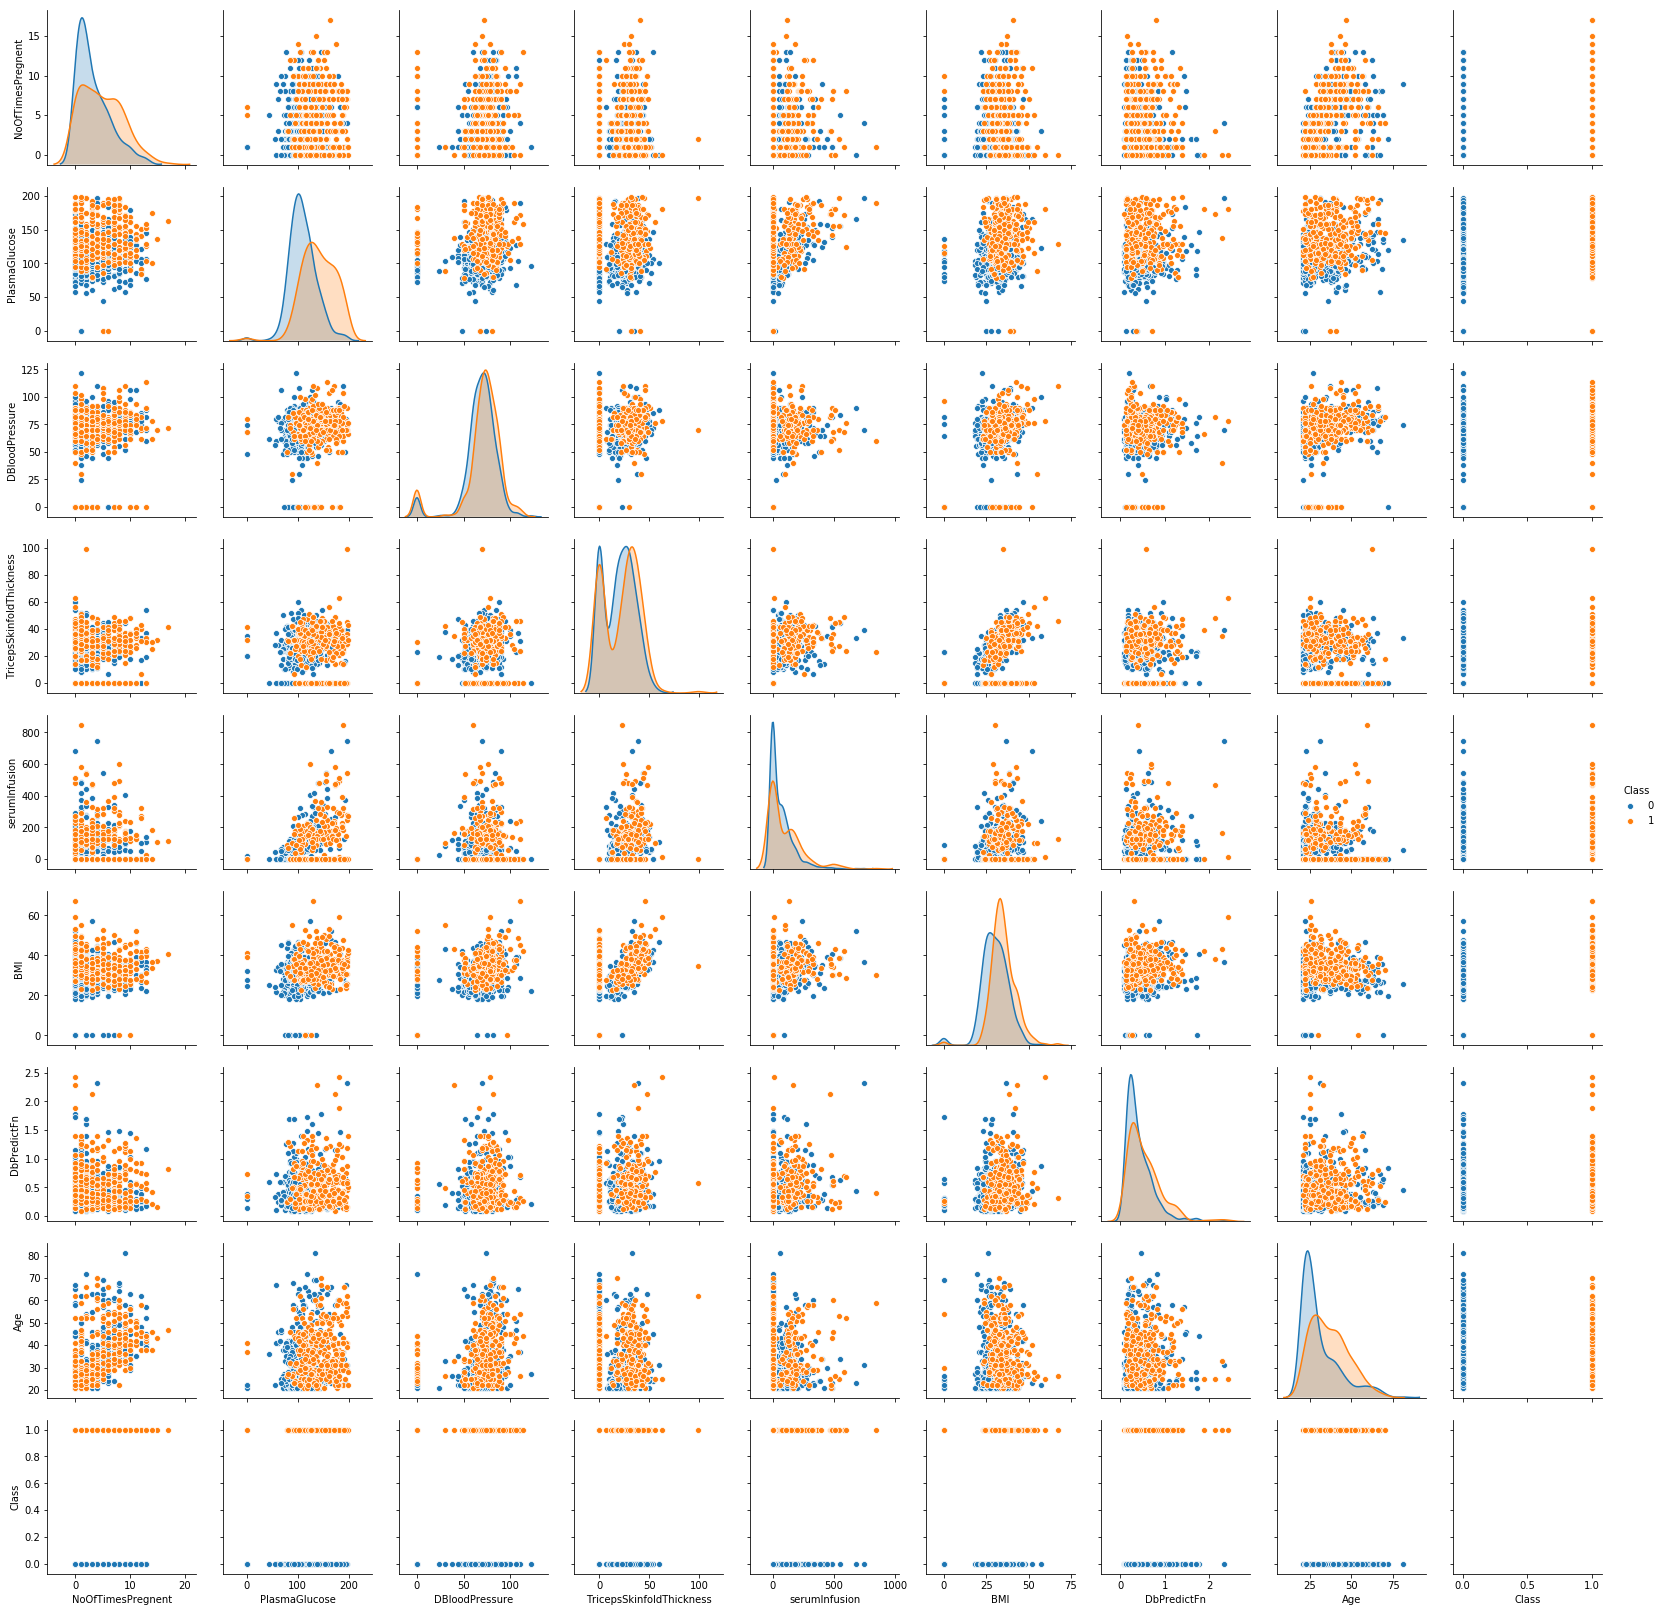

In [6]:
import warnings; warnings.simplefilter('ignore')
sns.pairplot(dataset, hue='Class')

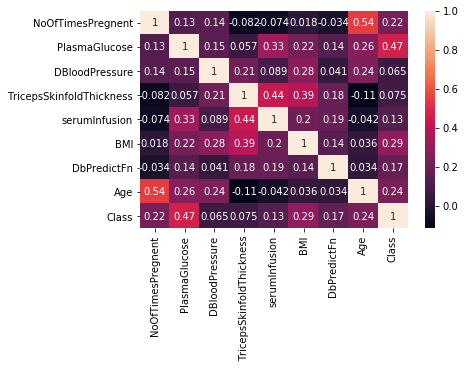

In [7]:
sns.heatmap(dataset.corr(), annot=True)

In [8]:
# creating input features and target variables
X= dataset.iloc[:,0:8]
y= dataset.iloc[:,8]

In [9]:
X.head(2)

,NoOfTimesPregnent,PlasmaGlucose,DBloodPressure,TricepsSkinfoldThickness,serumInfusion,BMI,DbPredictFn,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [10]:
#standardizing the input feature
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [13]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=8))
#Second  Hidden Layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [15]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=200)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
537/537 [==============================] - 2s 4ms/step - loss: 0.6891 - acc: 0.6611
Epoch 2/200
537/537 [==============================] - 0s 157us/step - loss: 0.6795 - acc: 0.6574
Epoch 3/200
537/537 [==============================] - 0s 153us/step - loss: 0.6630 - acc: 0.6574
Epoch 4/200
537/537 [==============================] - 0s 141us/step - loss: 0.6369 - acc: 0.6574
Epoch 5/200
537/537 [==============================] - 0s 142us/step - loss: 0.6018 - acc: 0.6927
Epoch 6/200
537/537 [==============================] - 0s 116us/step - loss: 0.5642 - acc: 0.7561
Epoch 7/200
537/537 [==============================] - 0s 132us/step - loss: 0.5320 - acc: 0.7784
Epoch 8/200
537/537 [==============================] - 0s 130us/step - loss: 0.5080 - acc: 0.7765
Epoch 9/200
537/537 [==============================] - 0s 133us/step - loss: 0.4912 - acc: 0.7803
Epoch 10/200
537/537 [==============================] - 0s 135us/step - 

537/537 [==============================] - 0s 129us/step - loss: 0.4413 - acc: 0.7933
Epoch 82/200
537/537 [==============================] - 0s 134us/step - loss: 0.4405 - acc: 0.7952
Epoch 83/200
537/537 [==============================] - 0s 117us/step - loss: 0.4405 - acc: 0.7952
Epoch 84/200
537/537 [==============================] - 0s 116us/step - loss: 0.4406 - acc: 0.7933
Epoch 85/200
537/537 [==============================] - 0s 121us/step - loss: 0.4405 - acc: 0.7933
Epoch 86/200
537/537 [==============================] - 0s 134us/step - loss: 0.4409 - acc: 0.7933
Epoch 87/200
537/537 [==============================] - 0s 143us/step - loss: 0.4403 - acc: 0.7952
Epoch 88/200
537/537 [==============================] - 0s 145us/step - loss: 0.4398 - acc: 0.7952
Epoch 89/200
537/537 [==============================] - 0s 148us/step - loss: 0.4397 - acc: 0.7914
Epoch 90/200
537/537 [==============================] - 0s 149us/step - loss: 0.4396 - acc: 0.7970
Epoch 91/200
537/537 [=

537/537 [==============================] - 0s 138us/step - loss: 0.4338 - acc: 0.8007
Epoch 163/200
537/537 [==============================] - 0s 143us/step - loss: 0.4338 - acc: 0.8026
Epoch 164/200
537/537 [==============================] - 0s 144us/step - loss: 0.4336 - acc: 0.8026
Epoch 165/200
537/537 [==============================] - 0s 146us/step - loss: 0.4333 - acc: 0.8026
Epoch 166/200
537/537 [==============================] - 0s 143us/step - loss: 0.4341 - acc: 0.7970
Epoch 167/200
537/537 [==============================] - 0s 139us/step - loss: 0.4344 - acc: 0.7933
Epoch 168/200
537/537 [==============================] - 0s 140us/step - loss: 0.4329 - acc: 0.8007
Epoch 169/200
537/537 [==============================] - 0s 153us/step - loss: 0.4332 - acc: 0.8007
Epoch 170/200
537/537 [==============================] - 0s 147us/step - loss: 0.4335 - acc: 0.8007
Epoch 171/200
537/537 [==============================] - 0s 146us/step - loss: 0.4330 - acc: 0.8007
Epoch 172/200


In [16]:
eval_model=classifier.evaluate(X_test, y_test)
eval_model

231/231 [==============================] - 0s 2ms/step


[0.4989000796239613, 0.7619047620337763]

In [17]:
y_pred=classifier.predict(X_test)
y_pred =(y_pred>0.5)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[124  23]
 [ 32  52]]
